<a href="https://colab.research.google.com/github/frisk0zisan/nlp100/blob/main/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6章 機械学習  
本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

## 50. データの入手・整形
[News Aggregator Data Set](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)をダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．  

 1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
 2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
 3. 抽出された事例をランダムに並び替える．
 4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．  

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

問題50のデータ整形において以下サイトを参考にし、写経した。  
[【言語処理100本ノック 2020】第6章: 機械学習](https://qiita.com/yamaru/items/374e6e2c045387f4d3b4)

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip

--2021-01-22 04:37:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  26.7MB/s    in 1.0s    

2021-01-22 04:37:42 (26.7 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]



In [2]:
!unzip "NewsAggregatorDataset.zip"

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [3]:
!wc -l ./newsCorpora.csv

422937 ./newsCorpora.csv


In [4]:
!head -10 ./newsCorpora.csv 

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [5]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

## データ読み込み
df = pd.read_csv('./newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

## データ抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']),['TITLE', 'CATEGORY']]

## データ分割
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])

## データ保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False )

In [7]:
## 事例数の確認
print("カテゴリ:(b = business, t = science and technology, e = entertainment, m = health)")
print('---学習データ---')
print(train['CATEGORY'].value_counts())
print('---検証データ---')
print(valid['CATEGORY'].value_counts())
print('---評価データ---')
print(test['CATEGORY'].value_counts())

カテゴリ:(b = business, t = science and technology, e = entertainment, m = health)
---学習データ---
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
---検証データ---
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
---評価データ---
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


In [8]:
df = pd.concat([train, valid, test], axis=0)
df.reset_index(drop=True, inplace=True)

In [9]:
df

,TITLE,CATEGORY
0,REFILE-UPDATE 1-European car sales up for sixt...,b
1,Amazon Plans to Fight FTC Over Mobile-App Purc...,t
2,Kids Still Get Codeine In Emergency Rooms Desp...,m
3,What On Earth Happened Between Solange And Jay...,e
4,NATO Missile Defense Is Flight Tested Over Hawaii,b
...,...,...
13351,UPDATE 1-Ousted American Apparel CEO Charney r...,b
13352,Is 'How I Met Your Mother' The Best Ensemble C...,e
13353,Miley Cyrus Resumes 'Bangerz' Tour At London's...,e
13354,'Game of Thrones' draws 7.1 mln viewers for bl...,e


## 51. 特徴量抽出Permalink

学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう

記事のタイトルの特徴量を抽出する

テキスト前処理をしておく
- 記号をスペースに変換
- アルファベットを小文字にする
- 数字を0に置換


In [10]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
import string
import re

## 事前処理関数
def pre(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  text = text.translate(table)
  text = text.lower()
  text = re.sub('[0-9]+', '0', text)
  return text

In [12]:
## 事前処理
df['TITLE'] =df['TITLE'].map(lambda x : pre(x))

In [13]:
df.head()

,TITLE,CATEGORY
0,refile update 0 european car sales up for sixt...,b
1,amazon plans to fight ftc over mobile app purc...,t
2,kids still get codeine in emergency rooms desp...,m
3,what on earth happened between solange and jay...,e
4,nato missile defense is flight tested over hawaii,b


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

## データ分割
train_valid = df[:len(train)+len(valid)]
test = df[len(train)+len(valid):]

## TF-IDF vectorizer
vectorizer = TfidfVectorizer(min_df=10) #単語頻度が10以下なら排除

## TF-IDF ベクトル化
X_train_valid = vectorizer.fit_transform(train_valid['TITLE']) 
X_test = vectorizer.transform(test['TITLE'])

##　ベクトル→ndarray→データフレーム
X_train_valid = pd.DataFrame(X_train_valid.toarray(), columns=vectorizer.get_feature_names())
X_test = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names())


X_train = X_train_valid[:len(train)]
X_valid = X_train_valid[len(train):]

## データ保存
X_train.to_csv('./X_train.txt', sep='\t', index=False)
X_valid.to_csv('./X_valid.txt', sep='\t', index=False)
X_test.to_csv('./X_test.txt', sep='\t', index=False)


In [15]:
X_train.head()

,0m,0million,0nd,0s,0st,0th,aa,aaliyah,abbvie,abc,about,above,abramson,abuse,ac,accelerates,access,accident,account,accused,accuses,ackman,acquire,across,act,acting,action,activists,actor,actress,actually,ad,adam,adds,admits,ads,advance,advances,advice,aereo,...,without,woes,woman,women,won,woodley,words,work,worker,workers,working,works,world,worries,worst,worth,would,wrapup,wren,wrong,wsj,wti,xbox,yahoo,year,years,yellen,yen,yet,yield,yields,york,you,young,your,yr,yuan,zac,zendaya,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 52. 学習Permalink

51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

### ロジスティク回帰とは
ロジスティック回帰とは、説明変数の情報に基づいて  
1. データがどのクラスに属するかを予測・分類する（例：ある顧客が商品を買うか買わないかを識別する）
2. 注目している出来事が発生する確率を予測する（例：ある顧客が何％の確率で商品を買うか予測する）　　

のために利用されるモデル
scikit-learnライブラリを用いてロジスティック回帰を行う
今回の説明変数は各記事のタイトルで、それに基づいてカテゴリを予測する。

### 説明変数とは
因果関係における原因のこと
$ y=f(x) $ のxの部分


In [16]:
train

,TITLE,CATEGORY
16218,REFILE-UPDATE 1-European car sales up for sixt...,b
350381,Amazon Plans to Fight FTC Over Mobile-App Purc...,t
148768,Kids Still Get Codeine In Emergency Rooms Desp...,m
210596,What On Earth Happened Between Solange And Jay...,e
234365,NATO Missile Defense Is Flight Tested Over Hawaii,b
...,...,...
248020,The Pillow Book of Tim Geithner,b
280908,Robin Thicke spends $20000 on Amethyst stone a...,e
132357,Japanese Shares Little Changed After Biggest R...,b
404892,WRAPUP 1-Liberia shuts schools as Ebola spread...,m


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression(random_state=123 ,max_iter=1000)
lr.fit(X_train, train['CATEGORY'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
lr.intercept_

array([ 0.68462783,  1.04184483, -1.15125185, -0.57522081])

In [20]:
lr.coef_

array([[-0.11102864, -0.39583586,  0.30675547, ..., -0.60628092,
        -0.32440383,  0.47230731],
       [ 0.27262936, -0.00646911, -0.25842093, ...,  1.2387062 ,
         0.57719566, -0.47556982],
       [-0.1406825 ,  0.58304312, -0.0811077 , ..., -0.33314651,
        -0.10625097,  0.05484997],
       [-0.02091823, -0.18073816,  0.03277315, ..., -0.29927878,
        -0.14654086, -0.05158746]])

## 53. 予測Permalink

52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [21]:
train_pred = lr.predict(X_train)
valid_pred = lr.predict(X_valid)

In [22]:
valid_pred

array(['t', 'e', 'b', ..., 'm', 'b', 'e'], dtype=object)

## 54. 正解率の計測Permalink

52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [23]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true=train['CATEGORY'], y_pred=train_pred)
valid_accuracy = accuracy_score(y_true=valid['CATEGORY'], y_pred=valid_pred)

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')

正解率（学習データ）：0.924
正解率（検証データ）：0.883


## 55. 混同行列の作成Permalink

52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [24]:
from sklearn.metrics import confusion_matrix

train_cnf_mtrix = confusion_matrix(y_true=train['CATEGORY'], y_pred=train_pred)
valid_cnf_mtrix = confusion_matrix(y_true=valid['CATEGORY'], y_pred=valid_pred)

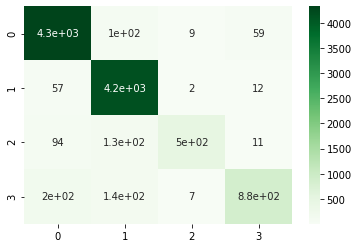

In [25]:
## 可視化 seabornが便利
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train_cnf_mtrix, annot=True, cmap='Greens')
plt.show()


## 56. 適合率，再現率，F1スコアの計測Permalink

52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

### マイクロ平均とは
**クラスごと**にF1値を計算し、平均したもの
正解率の場合：𝑛𝑖回のテストのうち，𝑥𝑖回が正解の場合，マイクロ平均は次式：
$\frac{\sum_{i=1}^{N} x_i}{\sum_{i=1}^{N} n_i}$

### マクロ平均とは
**全クラス**のF1値を計算したもの
正解率の場合：𝑛𝑖回のテストのうち，𝑥𝑖回が正解の場合，マクロ平均は次式：
$\frac{1}{N}\sum_{i=1}^{N}\frac{x_i}{n_i}$

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

## 適合率
precision = precision_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average=None, labels=['b', 'e', 't', 'm'])
precision = np.append(precision, precision_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='micro'))
precision = np.append(precision, precision_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='macro'))

## 再現率
recall = recall_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average=None, labels=['b', 'e', 't', 'm'])
recall = np.append(recall, recall_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='micro'))
recall = np.append(recall, recall_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='macro'))

## F1スコア
f1 = f1_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average=None, labels=['b', 'e', 't', 'm'])
f1 = np.append(f1, f1_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='micro'))
f1 = np.append(f1, f1_score(y_true=valid['CATEGORY'], y_pred=valid_pred, average='macro'))

scores = pd.DataFrame({'precision': precision, 'recall': recall, 'F1':f1}, index=['b', 'e', 't', 'm','micro ave', 'macro ave'])

In [27]:
scores

,precision,recall,F1
b,0.908146,0.930728,0.919298
e,0.868243,0.971645,0.917038
t,0.838983,0.647059,0.730627
m,0.877551,0.472527,0.614286
micro ave,0.883234,0.883234,0.883234
macro ave,0.873231,0.755490,0.795312


## 57. 特徴量の重みの確認Permalink

52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [28]:
np.argmax(lr.coef_)

7171

In [29]:
l_X_train_columns = list(X_train.columns)
print(len(l_X_train_columns))
l_X_train_index = list(X_train.index)
print(len(l_X_train_index))

2125
10684


In [31]:
l_X_train_index[np.argmax(lr.coef_)]

7171